pdf 
  2

pdf 
  2

Warning message in svg("iris.svg"):
“failed to load cairo DLL”

null device 
          1

ERROR: Error in eval(expr, envir, enclos): could not find function "win.metafile"


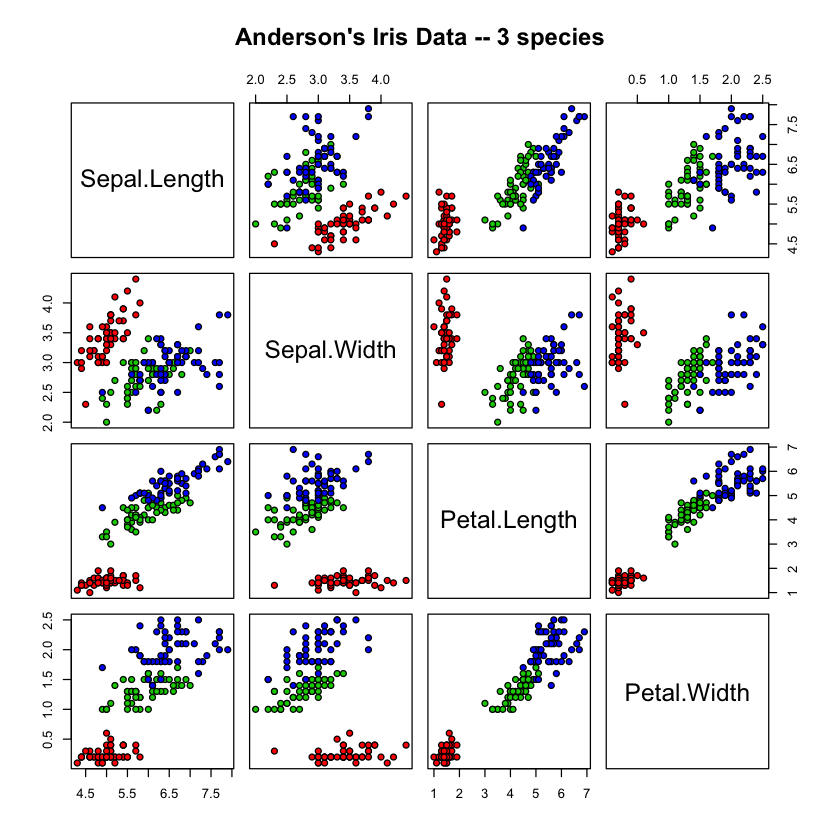

In [178]:
# Abgabe von Leonhard Gulewitsch

# Aufgabe 18

## a)

pdf("iris.pdf")
pairs(iris[1:4], main = "Anderson's Iris Data -- 3 species",
      pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)])
dev.off()

## b)

png("iris.png")
pairs(iris[1:4], main = "Anderson's Iris Data -- 3 species",
      pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)])
dev.off()

## c)

svg("iris.svg")
pairs(iris[1:4], main = "Anderson's Iris Data -- 3 species",
      pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)])
dev.off()

## d)

win.metafile("iris.wmf")
pairs(iris[1:4], main = "Anderson's Iris Data -- 3 species",
      pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)])
dev.off()

In [181]:
# Aufgabe 19

# load("//server01/lehre/ProgrammierenR/Daten/herz200.RData")
load("herz200.RData")

## a) + b) + c)

plot_titles <- c("der Diagnose", "der Patienten-Nummer", "des Geschlechts",
                 "des Untersuchungsdatums", "des Geburtsdatums", "der Körpergröße", "des Körpergewichts", 
                 "der Herzfrequenz", "des systolischer Blutdrucks", "des Rhythmuses", "des Alters", 
                 "des BMIs")

plot_labels <- c("Diagnose", "Patienten-Nummer", "Geschlecht\n (w = weiblich, m = männlich)",
                 "Untersuchungsdatum", "Geburtsdatum", "Körpergröße (in cm)", "Körpergewicht (in kg)", 
                 "Herzfrequenz (in bpm)", "Systolischer Blutdruck (in mmHgs)", "Rhythmus", "Alter (in Jahren)", 
                 "BMI in (kg/m^2)")

pdf("myPlots.pdf")

for(col_name in colnames(herz)) {
    index <- which(colnames(herz) == col_name)
    if(class(herz[[col_name]]) == "factor") {
        barplot(table(herz[[col_name]]), main = paste("Stabdiagramm", 
                                                      plot_titles[index]),
                xlab = plot_labels[index])
    }
    if(class(herz[[col_name]]) == "integer") {
        hist(table(herz[[col_name]]), main = paste("Histogramm", 
                                                   plot_titles[index]),
             xlab = plot_labels[index])
    }
    if(class(herz[[col_name]]) == "numeric") {
        boxplot(herz[[col_name]], ylab = plot_labels[index])
        title(paste("Boxplot", plot_titles[index]))
    }
    if(class(herz[[col_name]]) == "Date") {
        break_start <- as.Date(paste0(format(min(herz[[col_name]], na.rm = TRUE), "%Y"), "-01-01"))
        break_end <- as.Date(paste0(format(max(herz[[col_name]], na.rm = TRUE) + 365, "%Y"), "-01-01"))
        brks <- seq(break_start, break_end, by = "years")
        hist(herz[[col_name]], breaks = brks,
             main = paste("Histogramm", plot_titles[index]),
                 xlab = plot_labels[index])
        
    }
}

dev.off()

pdf 
  2

In [182]:
# Aufgabe 20

library(openxlsx)
# read.xlsx("//server01/lehre/ProgrammierenR/Daten/Luft.xlsx")
df.air <- read.xlsx("Luft.xlsx", sheet = 1)

In [183]:
## a)
df.air$Datum <- as.Date(read.xlsx("Luft.xlsx", sheet = 2)[[1]], "%B-%d %Y")

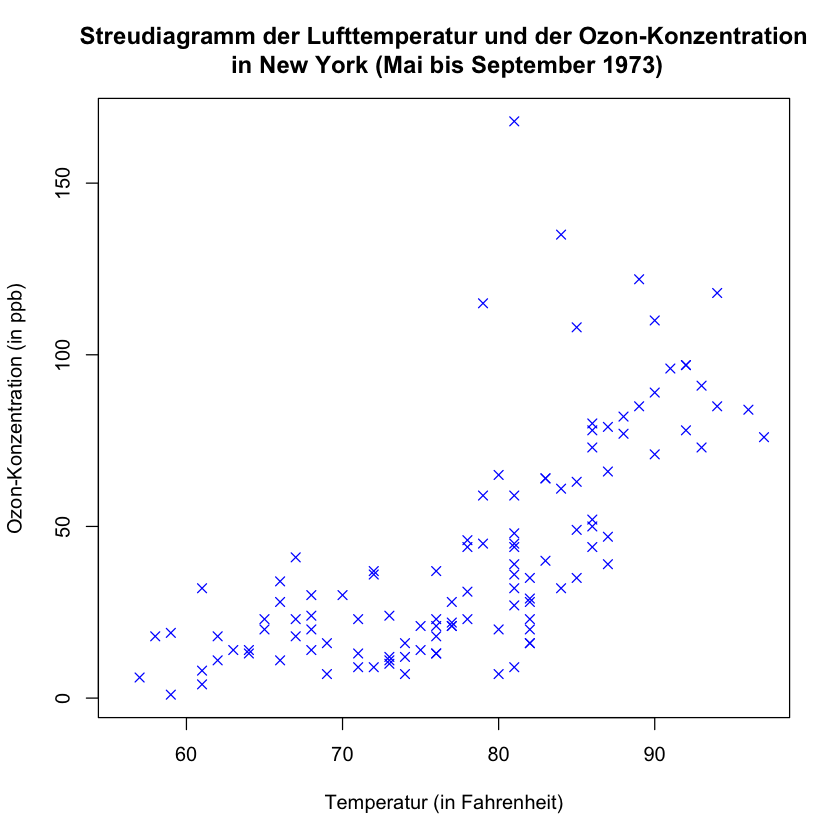

In [188]:
## b)
plot(df.air$Temp, df.air$Ozon, pch = 4, 
     col = 4, ylab = "Ozon-Konzentration (in ppb)", xlab = "Lufttemperatur (in Fahrenheit)")
title("Streudiagramm der Lufttemperatur und der Ozon-Konzentration\n in New York (Mai bis September 1973)")

# Anhand des erzeugten Streudiagramms laesst sich eine schwache positive Korrelation zwischen der Ozon-Konzentration 
# und der Lufttemperatur erahnen. Dabei ist folgende Einschraenkung zu erwaehnen: Zwischen 60 und 80 Grad Fahrenheit 
# scheint kein Zusammenhang zwischen der Lufttemperatur und der Ozon-Konzentration zu herrschen. Erst ueber 80 Grad 
# Fahrenheit scheint mit steigender Lufttemperatur eine steigende Ozon-Konzentration einherzugehen. Aus dieser Grafik 
# geht jedoch kein kausaler Zusammenhang hervor.

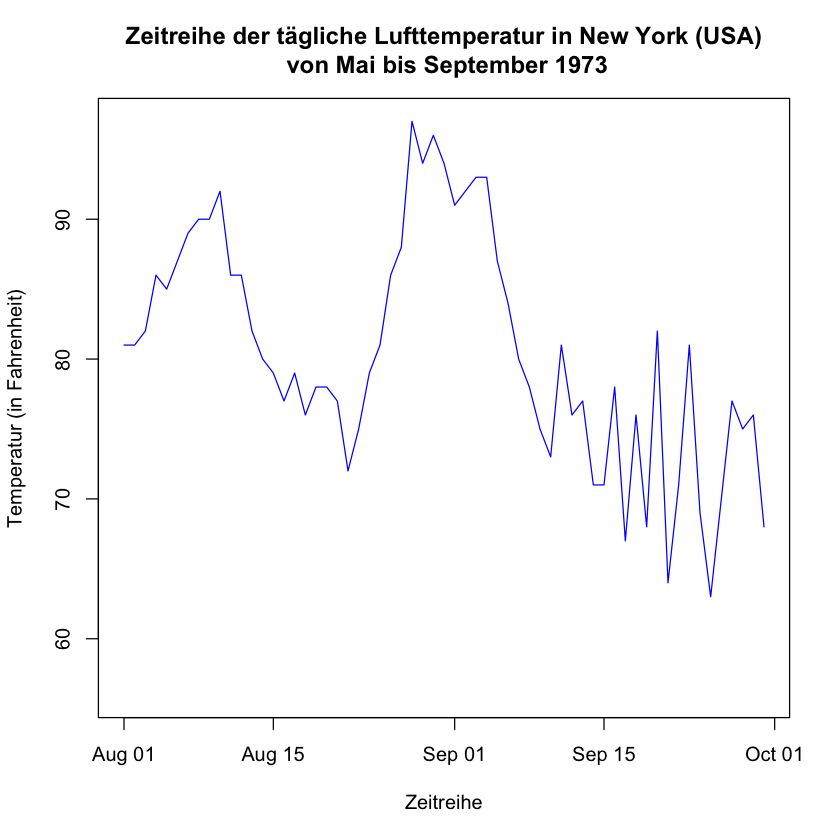

In [186]:
## c)
plot(df.air$Datum, df.air$Temp, type = "l", pch = 4, 
     col = 4, xlab = "Zeitreihe", ylab = "Lufttemperatur (in Fahrenheit)")
title("Zeitreihe der tägliche Lufttemperatur in New York (USA)\n von Mai bis September 1973")

In [ ]:
# Aus der erzeugten Zeitreihe laesst sich kein eindeutiger Trend über den gesamten beobachteten Zeitintervalls erkennen. 
# In der ersten Haelfte des Zeitintervalls scheint die Lufttemperatur dennoch eine Wachstumsperiode zu durchlaufen.
# Zweiten Haelfte scheint die Lufttemperatur tendenziell wieder zu sinken. Der Graph enthaelt viel "Spitzen" und "Taeler";
# diese Eigenschaft verhindert es eine eindeutige Tendenz zu erkennen.